<a href="https://colab.research.google.com/github/shubham-jindal/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Loading Dataset and Importing Modules and Libraries**

In [307]:
#Impoting Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

##Importing Dataset

In [308]:
#mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [309]:
#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 2(Regression)/SeoulBikeData.csv',encoding= 'latin')

## Displaying dataset

In [310]:
# Taking a look to data
# Display the data of first 5 rows 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [311]:
#Last 5 Rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [312]:
#Shape of the Data
df.shape

(8760, 14)

## Checking number of null values in all columns

In [313]:
# Check the total null values of different coloumns and sort them in ascending order
df.isnull().sum().sort_values(ascending = False)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no Null values in the Dataset.

In [314]:
#Checking all the coloums 
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [315]:
# Get the description of the data in the data frame
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [316]:
# glance of information in the dataset
# dataset consist of 8760 rows and 14 columns
# there are several data types: object, int64, and float64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

##Printing Unique Values

In [317]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# **Preprocessing the data**

Preprocessing the data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps:
1.   Remove duplicate rows
2.   Handling missing values
3.   Convert columns to appropriate datatypes
4.   Adding important columns


**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.*** 

In [318]:
#check for count of missing values in each column.
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* ***As we can see above there are no missing value presents thankfully***

##Duplicate values

###Remove duplicate rows

In [319]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***There are no Duplicate values in this dataset.***

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*






###Rename Columns According to our need

In [320]:
#Rename the columns name
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

##Breaking down date column

In [321]:
# Changing the "Date" column into three "year","month","day" column
df['Date'] = df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [322]:
#Let's create a new column "weekend_and_weekdays" and delete "Date","day","year" these columns.
df['weekend_and_weekdays']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day','year'],axis=1)

* ***We dropped all these 3 Columns.***
* ***We mainly require which daya are working days and which are weekend or holiday.*** 

In [323]:
#Let's check our data now.
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekend_and_weekdays
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [324]:
df['weekend_and_weekdays'].value_counts()

0    6264
1    2496
Name: weekend_and_weekdays, dtype: int64

###Now we will change the data type of some columns to category column

In [325]:
#Change the column into catagory column
cols=['Hour','month','weekend_and_weekdays']
for col in cols:
  df[col]=df[col].astype('category')

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekend_and_weekdays   8760 non-null   c

In [327]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekend_and_weekdays'],
      dtype='object')

# **Exploratory Data Analysis Of The Data Set**

**We will be doing Univariate Analysis, Analysis of Dependent Variable and Analysation of categorical variables**

[Text(0.5, 1.0, 'Count of bikes acording to weekend_and_weekdays ')]

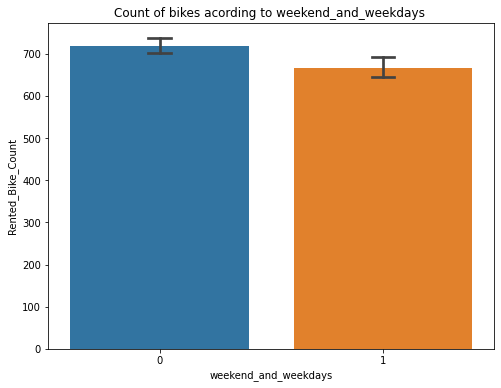

In [328]:
#Weekend_and_weekdays column comparison
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=df,x='weekend_and_weekdays',y='Rented_Bike_Count',ax=ax,capsize=.1)
ax.set(title='Count of bikes acording to weekend_and_weekdays ')

* ***The number of bikes rented on working days and weekend and weekdays are almost equal.***

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekend_and_weekdays ')]

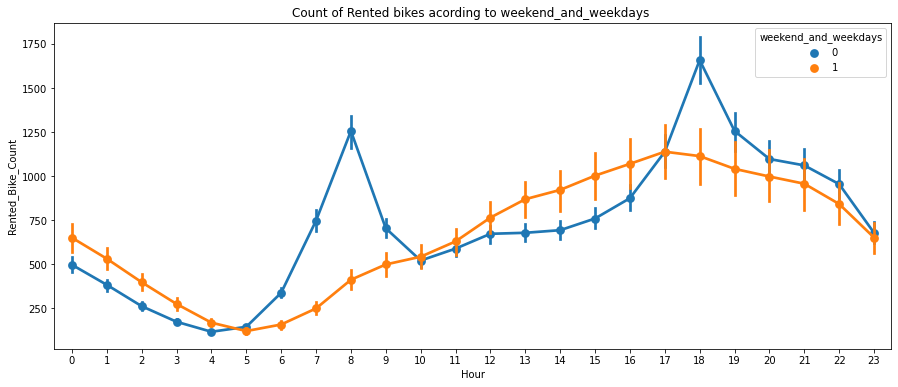

In [329]:
fig,ax=plt.subplots(figsize=(15,6))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue ='weekend_and_weekdays',ax=ax)
ax.set(title='Count of Rented bikes acording to weekend_and_weekdays ')

* ***After analysing above graph we can say that the Blue line which is representing working days is getting more demand as compared to orange line which is for weekend or week days.***
* ***From 7am to 9 am and 5 pm to 9 pm demand is higher because these are the peek office hours.***
* ***On Weekend and weekdays demand is very low in morning but it increase in the evening.***

## **Vizualisation of Rented bikes according to hour.**

[Text(0.5, 1.0, 'Number of Rented bikes acording to Hour ')]

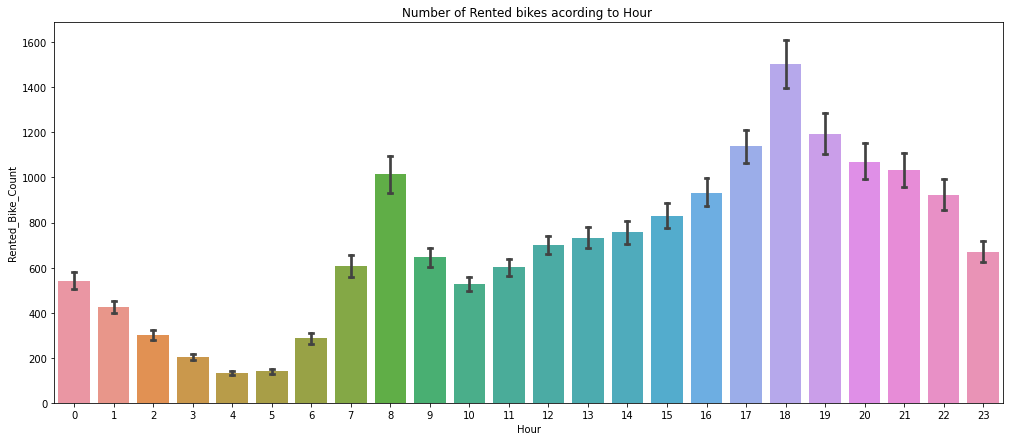

In [330]:
fig,ax=plt.subplots(figsize=(17,7))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.1)
ax.set(title='Number of Rented bikes acording to Hour ')

* ***Number of bikes rented in the morning are less as compared to the bikes rented in the evening.***
* ***Maximum no. of bikes are rented at 6Pm.***
 

[Text(0.5, 1.0, 'Number of Rented bikes in each Season ')]

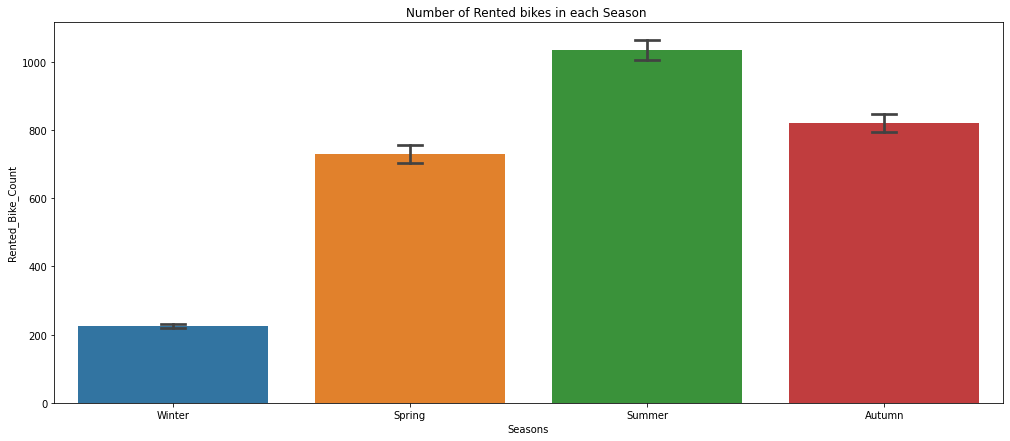

In [331]:
fig,ax=plt.subplots(figsize=(17,7))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.1)
ax.set(title='Number of Rented bikes in each Season ')

* ***In summer season maximum number of bikes are rented.***

[Text(0.5, 1.0, 'Number of Rented bikes according to every month ')]

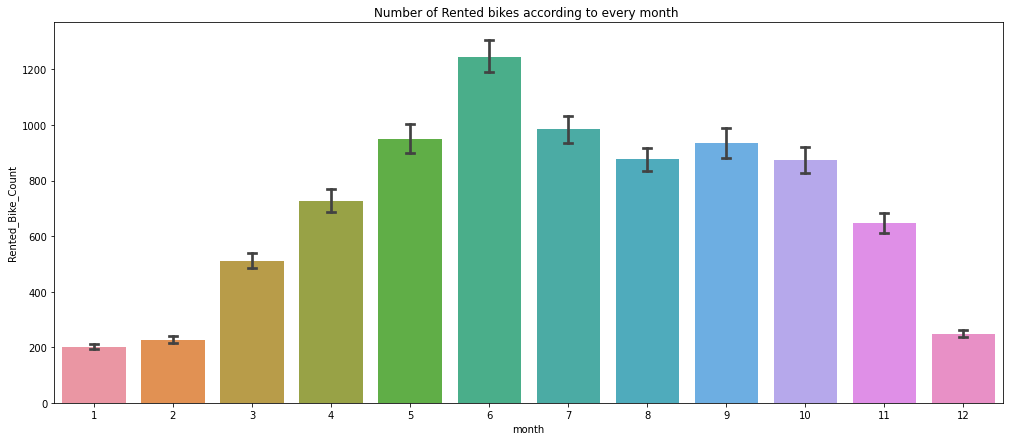

In [332]:
fig,ax=plt.subplots(figsize=(17,7))
sns.barplot(data=df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.1)
ax.set(title='Number of Rented bikes according to every month ')

* ***From may to october month maximum number of bikes are rented.***

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

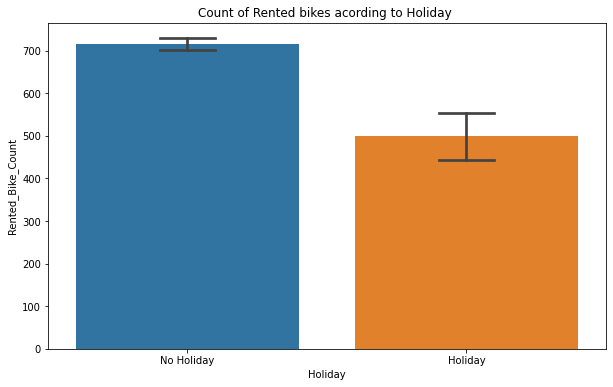

In [333]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

* ***Number of bikes rented are more when there is no holiday.***

#Let's analyze all Numerical Variables.

In [334]:
num_columns=list(df.select_dtypes(['int64','float64']).columns)
num_variables=pd.Index(num_columns)
num_variables

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

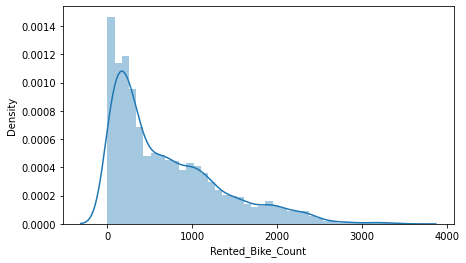

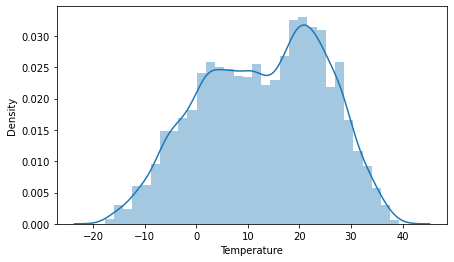

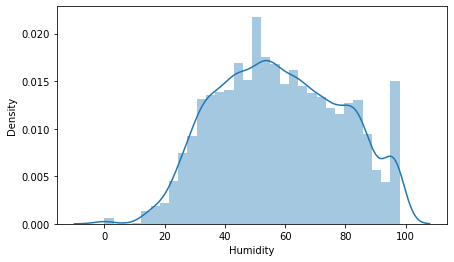

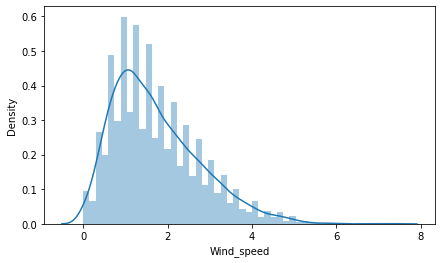

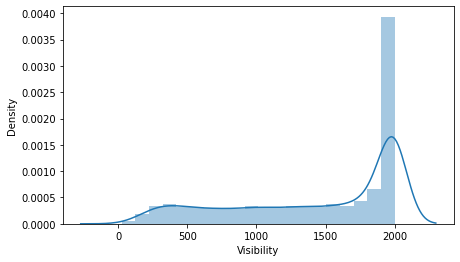

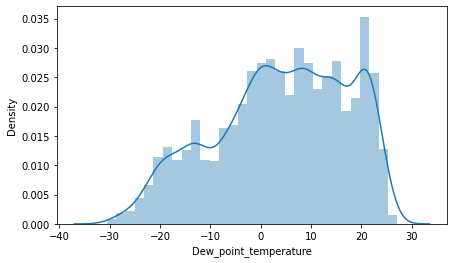

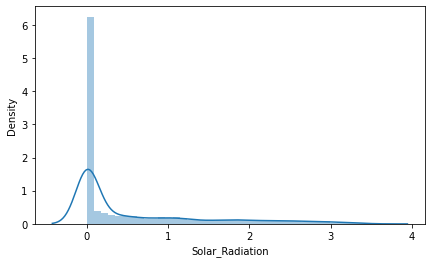

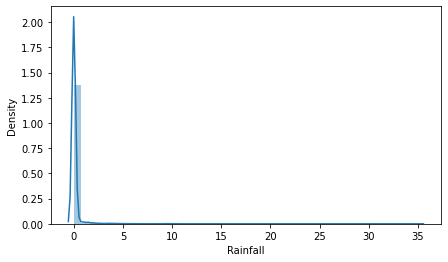

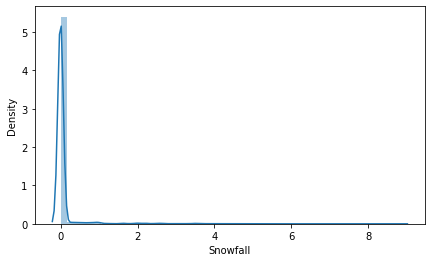

In [335]:
#Let's Plot all the numerical variables
for col in num_variables:
  plt.figure(figsize=(7,4))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

##Now we will compare all numerical variables with no. of bikes rented.

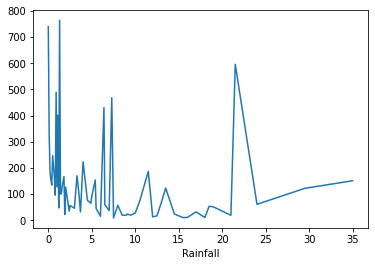

In [336]:
#Comparison between rainfall and rented bikes.
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

* ***From above graph we can see that rainfall does not affect the no. of bikes rented even in heavy rainfall the no. of rented bikes are more.***

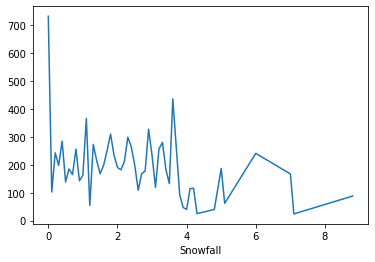

In [337]:
#Comparison between snowfall and rented bikes.
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

* ***Snowfall does not have much effect on the no. of bikes rented but no. of bikes rented slightly decreases when the snowfall is very high.***

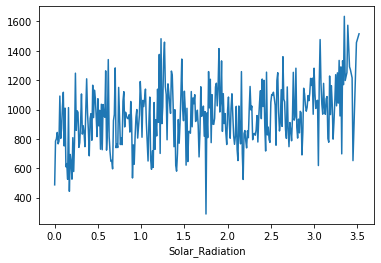

In [338]:
#Comparison between Solar Radiation and rented bikes.
df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

* ***Solar Radiation does not have any effect on the no. of bikes rented.***

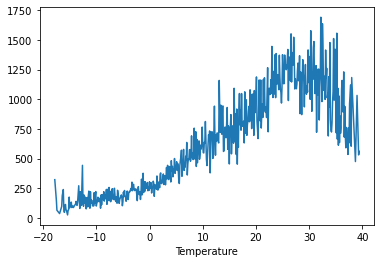

In [339]:
#Comparison between Temprature and rented bikes.
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

* ***When the Temprature is very less or in minus the no. of bikes rented are very less but as the temperature increase the no. of bikes rented also increases and after the temprature increases from 35 no. of bikes rented again starts decreasing.***

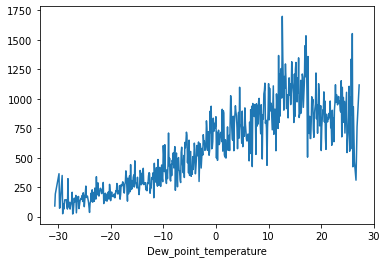

In [340]:
#Comparison between Dew Point Temprature and rented bikes.
df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

* ***Dew point temperature have same pattern as the Temperature.***

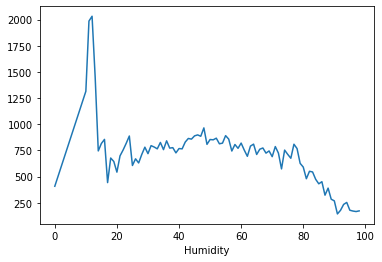

In [341]:
#Comparison between Humidity and rented bikes.
df.groupby('Humidity').mean()['Rented_Bike_Count'].plot()

* ***When the humidity is 10 no. of bikes rented are maximum byt when the humidity increases from 80 the no. of bikes rented starts decreasing.***

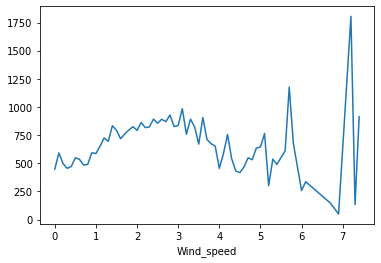

In [342]:
#Comparison between Wind Speed and rented bikes.
df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

* ***When the speed of the wind is 0 to 6 the no. of bikes rented are approximately same but after speed of 6 the no. of bikes rented decreases drastically and again increases drastically after the wind speed of 7.***

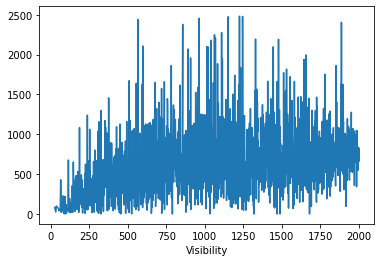

In [343]:
#Comparison between Visibility and rented bikes.
df.groupby('Visibility').mean()['Rented_Bike_Count'].plot()

* ***After observing the above graph we can say that the visibility does not have any effect on the number of bikes rented.***

#Regression Plot or Graph

* ***This plot will show us the linear relationship between 2 variables. We will try to understand the relationship between rented bikes and all numerical variables.***

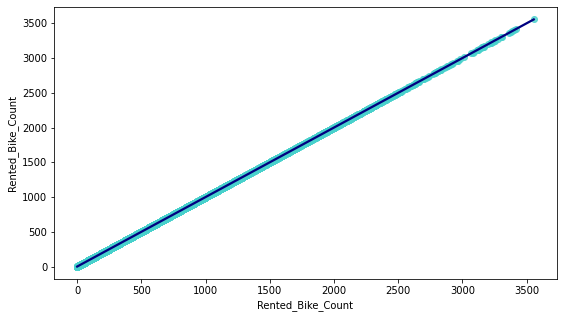

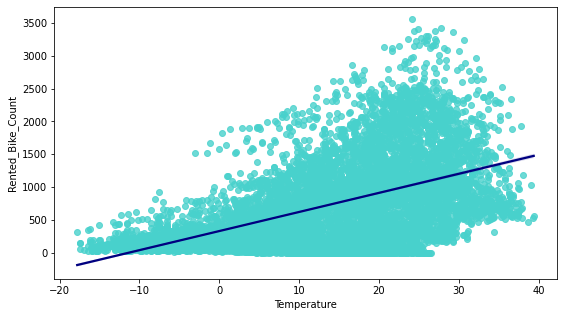

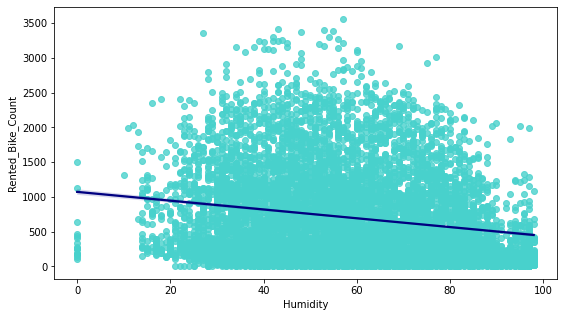

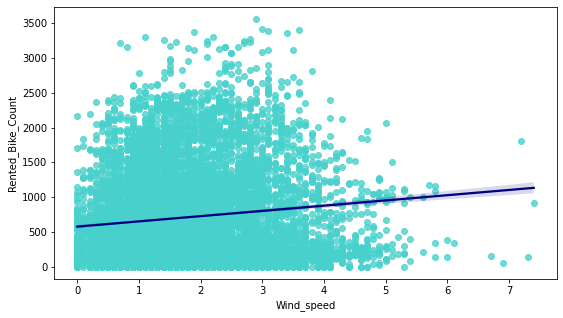

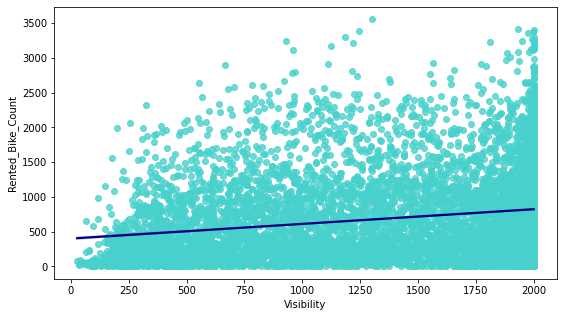

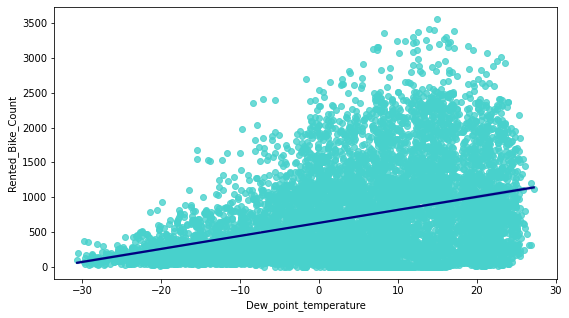

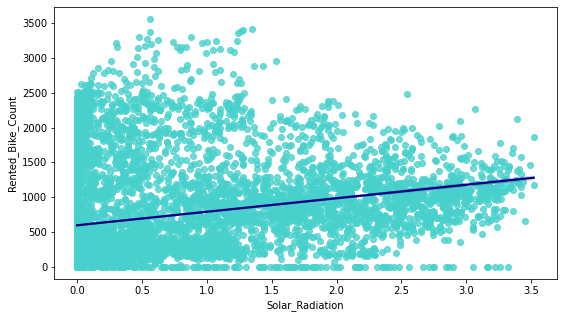

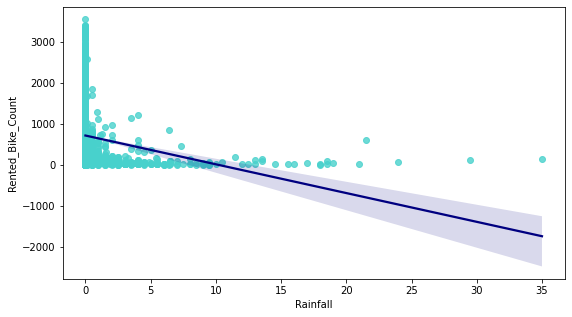

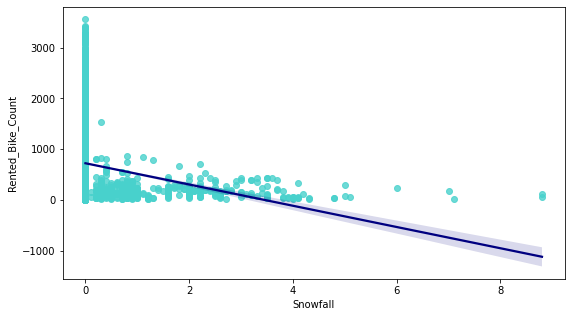

In [344]:
#Showing the regression plot for all the numerical features
for col in num_variables:
  fig,ax=plt.subplots(figsize=(9,5))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'mediumturquoise'}, line_kws={"color": "navy"})

#Distribution Plot

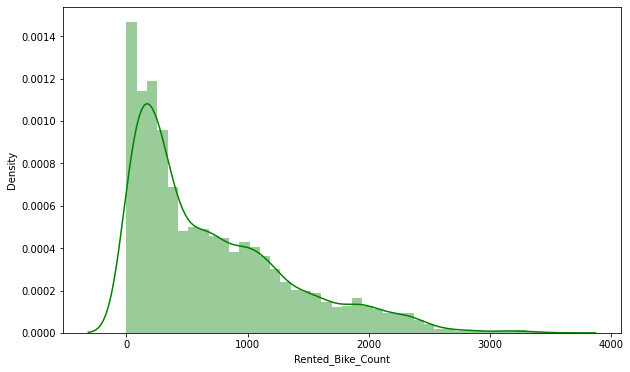

In [345]:
#Let,s see the distribution plot for the Rented Bikes Column.
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="g")
plt.show()

* ***From the above graph we can say that the distribution is Right Skewed.***
* ***But in the linear regression we have the assumption that the distribution is normal so we need to normalise this distribution.***

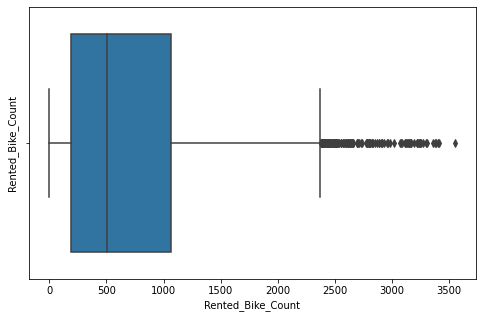

In [346]:
#Let,s check for the outliers
plt.figure(figsize=(8,5))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

* ***There are a lot of outliers in this column so we will remove these outliers and then again check the distribution.***

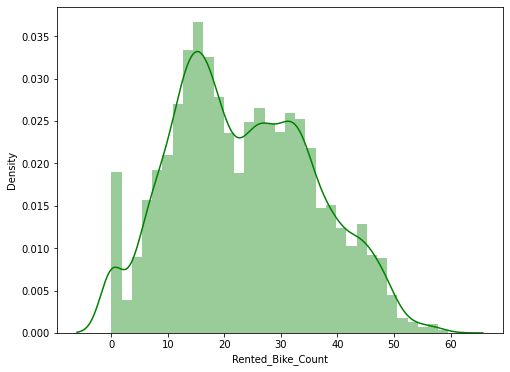

In [347]:
#Applying square root to Rented Bike Count
plt.figure(figsize=(8,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="g")

plt.show()

* ***After applying square root to this column the distribution of this columns has become almost normal and outlier are also removed from the column.***

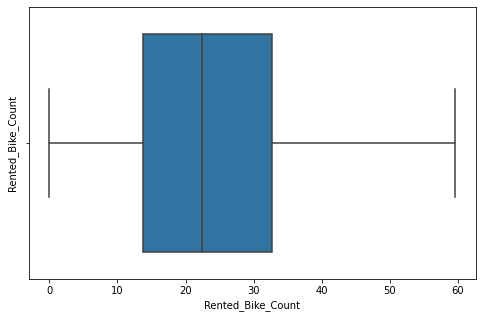

In [348]:
#Let,s check agin for the outliers
plt.figure(figsize=(8,5))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

* ***There are no outliers present in Rented Bikes Column.***

#Correlation between different Variables

In [349]:
import statsmodels.api as sm
X = df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = df['Rented_Bike_Count']

df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekend_and_weekdays
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [350]:
#adding a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [351]:
#Let,s fit an ols model
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:55:17   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*  **The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity.***
**R sqauare and Adj Square are almost same.***
*  **P value of dew point temp and visibility are very high and they are not significant.**

In [352]:
#Let,s chcek correlation again
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


* ***After observing the model and correlation we can say that temperature and dew point temperature are highle correlated to each other so we need to drop one column from these two.***
* ***As the p value for dew point temperature is higher so we can drop this column.***

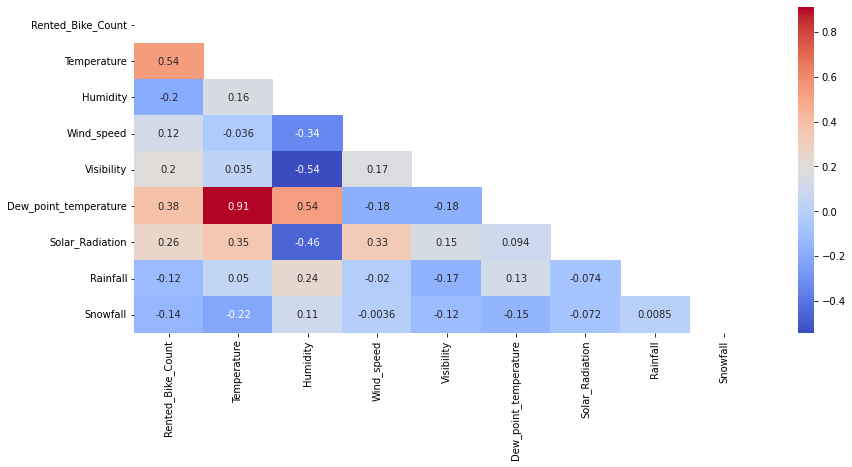

In [353]:
#Let.s Plot Correlation Heatmap
plt.figure(figsize=(14,6))
heatmap=df.corr()
mask = np.triu(np.ones_like(heatmap, dtype=bool))
sns.heatmap((heatmap),mask=mask, annot=True,cmap='coolwarm')

***Variables which are most poitively correlated to rented bikes are***
* Solar radiation
* Dew point temperature
* Temperature

***Variables which are least or negatively correlayed to rented bikes are***
* Rainfall
* Snowfall
* Humidity

###It is clear from the heatmap that the temperature and dew point temperature are highly correlated to each other so we can drop one column from them.

In [354]:
#Let,s drop dew point temperature
df=df.drop(['Dew_point_temperature'],axis=1)

In [355]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekend_and_weekdays
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


# Categorical variable conversion

* ***A dataset cintains different types of variables like int, float, categorical.***
* ***Linear Regression can not deal with categorical variables so we need to convert those into numerical variables.***
* ***Now we will create some dummy variables from these categorical variables.***

In [356]:
#Extracting all categorical features
category_fea = list(df.select_dtypes(['object','category']).columns)
category_fea = pd.Index(category_fea)
category_fea

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekend_and_weekdays'],
      dtype='object')

###Now we will convert the categorical variables into numerical variables or the type of variable our ML model can understand and process. This process is called one hot encoding.

In [357]:
#Making copy of the dataset
df_copy = df

In [358]:
def variable_converter(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data


In [359]:
#Let.s fit above function on our data
for col in category_fea:
    df_copy = variable_converter(df_copy, col)
df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekend_and_weekdays_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


* ***Now our dataset is ready for our Machine Learning model.***

#**Importing all Required models and packages**

In [360]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

##**Machine Learning Models**

* ***First step in ML is splittig data into train and test.***
* ***Some of the data will be used to train the model and some data will be used to test the moedl.***
* ***The general proportions taken are 70:30,75:25,80:20 depending on the size of the dataset.***

In [361]:
#Let's assign dependent and independent variables to x and y.
x = df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df_copy['Rented_Bike_Count'])

In [362]:
x.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekend_and_weekdays_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [363]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [364]:
#Let,s split our data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)
print(x_train.shape)
print(x_test.shape)

(7008, 47)
(1752, 47)


#**Linear Regression**

What is linear regression? Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [365]:
#Importing package
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(x_train, y_train)

In [366]:
reg.score(x_train, y_train)

0.774552733127227

In [367]:
#Checking the coffecients
reg.coef_

array([ 5.13015001e-01, -1.22767765e-01, -4.13104408e-02,  1.11126717e-03,
        9.16726772e-01, -1.53255739e+00, -8.07221707e-02, -1.94872076e+00,
       -4.88230923e+00, -7.21855453e+00, -9.45851795e+00, -9.09121713e+00,
       -4.05091972e+00,  2.20684936e+00,  7.54238336e+00,  1.32579748e+00,
       -3.16495893e+00, -3.43098498e+00, -2.72035349e+00, -2.91898181e+00,
       -2.94597914e+00, -1.84312618e+00,  1.20075989e-01,  3.83601768e+00,
        1.03636667e+01,  6.80211377e+00,  6.02819351e+00,  6.32722687e+00,
        5.10060148e+00,  1.55360176e+00, -5.11903126e+09, -1.00675215e+10,
       -7.31652142e+09,  3.46321841e+00,  2.83463701e+01, -8.43493577e-01,
       -2.19749016e+09, -2.19749016e+09, -2.19749016e+09,  2.75100004e+09,
        2.75100003e+09,  2.75100003e+09, -7.31652142e+09, -7.31652141e+09,
       -7.31652142e+09,  2.05547236e+00, -1.44324639e+00])

In [368]:
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

**1.Checking the performance of ml model using evaluation metric score chart.**

In [369]:
from sklearn.metrics import mean_squared_error
#Let,s check MSE
MSE_s= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_s)

#Let,s check RMSE
RMSE_s=np.sqrt(MSE_s)
print("RMSE :",RMSE_s)

#Let,s calculate MAE
MAE_s= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_s)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_s= r2_score(y_train, y_pred_train)
print("R2 :",r2_s)
Adjusted_R2_s = (1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 34.793980690219946
RMSE : 5.898642275152812
MAE : 4.459079727099164
R2 : 0.774552733127227
Adjusted R2 : 0.7683344106254546


* ***R2 score for our model is 77 it means our model is performing well on the dataset and is able to predict most of the values correctly.***
* ***Now we will geaphically plot our results in a scatter Plot.***

In [370]:
#First we will store train set matrices in a seprate dataframe.
first = {'Model':'Linear regression ',
       'MAE':round((MAE_s),3),
       'MSE':round((MSE_s),3),
       'RMSE':round((RMSE_s),3),
       'R2_score':round((r2_s),3),
       'Adjusted R2':round((Adjusted_R2_s ),2)
       }
metric_train_df=pd.DataFrame(first,index=[1])

In [371]:
#Let,s check MSE
MSE_s= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE_s)

#Let,s check RMSE
RMSE_s=np.sqrt(MSE_s)
print("RMSE :",RMSE_s)

#Let,s calculate MAE
MAE_s= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_s)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_s= r2_score(y_test, y_pred_test)
print("R2 :",r2_s)
Adjusted_R2_s = (1-(1-r2_score(y_test, y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 33.894124066686764
RMSE : 5.821866029606553
MAE : 4.442357194447212
R2 : 0.78478043307297
Adjusted R2 : 0.7788442126236915


* ***R2 score for our test data is 78 it means our model is performing well on the dataset and is able to predict most of the values correctly.***

In [372]:
#First we will store test set matrices in a seprate dataframe.
first = {'Model':'Linear regression ',
       'MAE':round((MAE_s),3),
       'MSE':round((MSE_s),3),
       'RMSE':round((RMSE_s),3),
       'R2_score':round((r2_s),3),
       'Adjusted R2':round((Adjusted_R2_s ),2)
       }
metric_test_df=pd.DataFrame(first,index=[1])

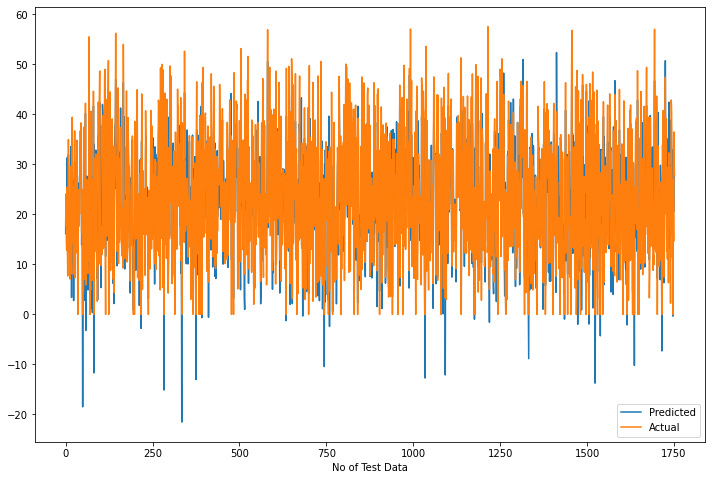

In [373]:
#Plotting the actaul and predicted values
plt.figure(figsize=(12,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

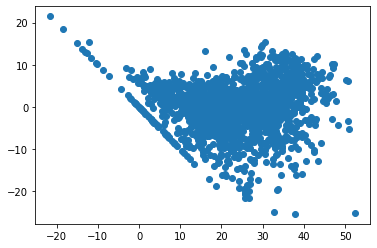

In [374]:
#Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

# **RIDGE REGRESSION**

In [375]:
#importing the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [376]:
#Fitting THE MODEL
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [377]:
#Let,s check the score
ridge.score(x_train, y_train)

0.7745526676567281

In [378]:
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

**1.Checking the performance of ml model using evaluation metric score chart.**

In [379]:
from pandas.core.series import maybe_cast_pointwise_result
#Let,s check MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#Let,s check RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

#Let,s calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r = (1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 34.79399079448648
RMSE : 5.898643131643623
MAE : 4.459182443622989
R2 : 0.7745526676567281
Adjusted R2 : 0.7683343433491379


* ***The R2 value here is 77 it means our model is able to predict most of the values correctly and model is fitting very well.***

In [380]:
#Let's store the train matrices in a dataframe.
first = {'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)
       }
metric_train_df=metric_train_df.append(first,ignore_index=True)

**Applying metrices on test data.**

In [381]:
#Let,s check MSE
MSE_r= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE_r)

#Let,s check RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

#Let,s calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_r= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2_r)
Adjusted_R2_r = (1-(1-r2_score(y_test, y_pred_test_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 33.895549782198074
RMSE : 5.821988473210684
MAE : 4.442581858864035
R2 : 0.7847713801210688
Adjusted R2 : 0.778834909971826


* ***The R2 value for Test data is 78 it means our model is able to predict most of the values correctly and model is fitting very well.***

In [382]:
#Let's store the test matrices in a dataframe.
first = {'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)
       }
metric_test_df=metric_test_df.append(first,ignore_index=True)

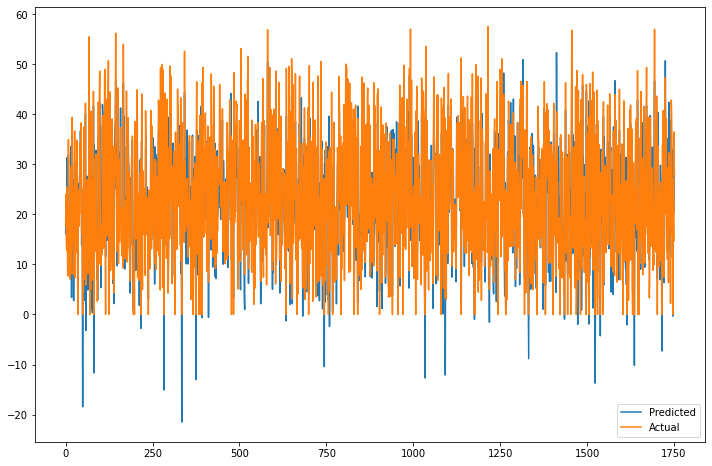

In [383]:
#Let's Plot the figure
plt.figure(figsize=(12,8))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

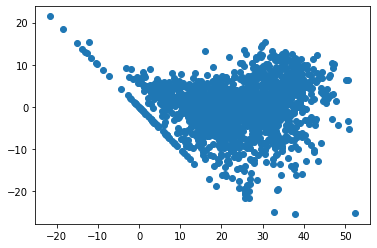

In [384]:
#Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# **LASSO REGRESSION**

In [385]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=2500)

lasso.fit(x_train, y_train)
# Let's print the model score
print(lasso.score(x_test, y_test), lasso.score(x_train, y_train))

0.38369573583917327 0.4048286433798308


In [386]:
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

**1.Checking the performance of ml model using evaluation metric score chart.**

In [387]:
#Let,s check MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#Let,s check RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#Let,s calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 91.85465398123709
RMSE : 9.584083366772072
MAE : 7.267171202255601
R2 : 0.4048286433798308
Adjusted R2 : 0.3884125320176547


* ***R2 score for train data is 40 it means model is not able to predict even half values correctly.***

In [388]:
#Let's store the train matrices in a dataframe.
first = {'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
metric_train_df=metric_train_df.append(first,ignore_index=True)

**Applying metrices on test data.**

In [389]:
#Let,s check MSE
MSE_l= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE_l)

#Let,s check RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#Let,s calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_l= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_test, y_pred_test_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 97.05945184518272
RMSE : 9.851875549619104
MAE : 7.4573120369945896
R2 : 0.38369573583917327
Adjusted R2 : 0.36669673324788277


* ***R2 score for test data is 38 it means model is not able to predict even half values correctly.***

In [390]:
#Let's store the test matrices in a dataframe.
first = {'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
metric_test_df=metric_test_df.append(first,ignore_index=True)

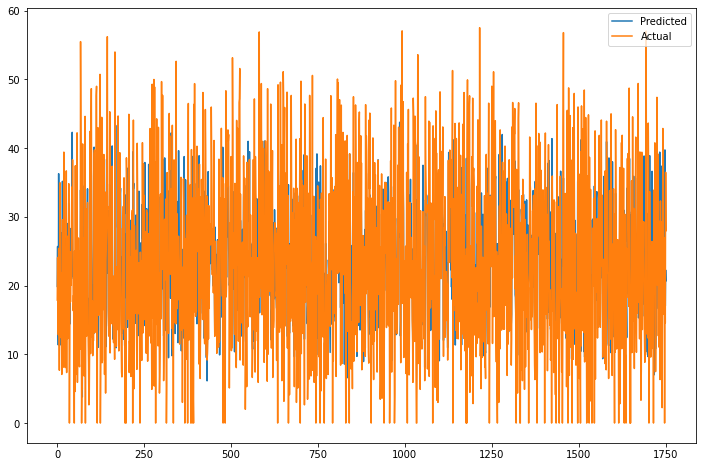

In [391]:
#Let's Plot the figure
plt.figure(figsize=(12,8))
plt.plot((y_pred_test_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

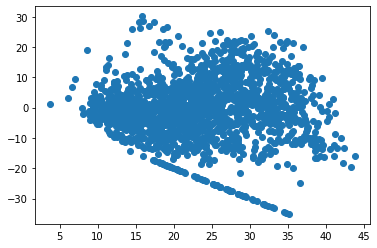

In [392]:
#Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso))

# **ELASTIC NET REGRESSION**

In [393]:
#import the packages
from sklearn.linear_model import ElasticNet

In [394]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [395]:
#Let's fir the model
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [396]:
#Check the score
elasticnet.score(x_train,y_train)

0.6281465994066953

In [397]:
#get the x_train and x-test value
y_pred_train_enr=elasticnet.predict(x_train)
y_pred_test_enr=elasticnet.predict(x_test)

**1.Checking the performance of ml model using evaluation metric score chart.**

In [398]:
#Let,s check MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_enr))
print("MSE :",MSE_e)

#Let,s check RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

#Let,s calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_enr)
print("MAE :",MAE_e)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_enr)
print("R2 :",r2_e)
Adjusted_R2_e = (1-(1-r2_score(y_train, y_pred_train_enr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_enr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 57.38929648296662
RMSE : 7.575572353490304
MAE : 5.794242939574975
R2 : 0.6281465994066953
Adjusted R2 : 0.6178900795546498


**Looks like our r2 score value is 0.62 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [399]:
#Let's store the train matrices in a dataframe.
first = {'Model':'Elastic Net Regression',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)
       }
metric_train_df=metric_train_df.append(first,ignore_index=True)

**Applying metrices on test data.**

In [400]:
#Let,s check MSE
MSE_e= mean_squared_error((y_test), (y_pred_test_enr))
print("MSE :",MSE_e)

#Let,s check RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

#Let,s calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_enr)
print("MAE :",MAE_e)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_e= r2_score(y_test, y_pred_test_enr)
print("R2 :",r2_e)
Adjusted_R2_e = (1-(1-r2_score(y_test, y_pred_test_enr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_enr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 59.772714864715596
RMSE : 7.731281579706924
MAE : 5.87762244831337
R2 : 0.6204575819122369
Adjusted R2 : 0.6099889823523044


**R2 score for our test data is 0.62 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [401]:
#Let's store the test matrices in a dataframe.
first = {'Model':'Elastic Net Regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)
       }
metric_test_df=metric_test_df.append(first,ignore_index=True)

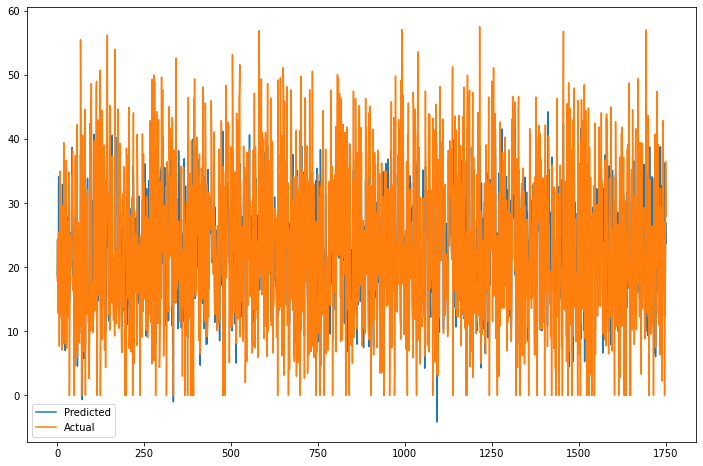

In [402]:
#Let's Plot the figure
plt.figure(figsize=(12,8))
plt.plot((y_pred_test_enr))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

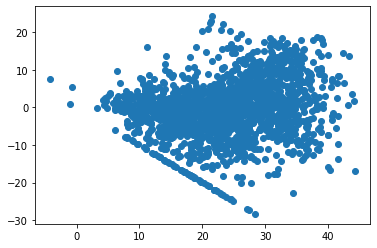

In [403]:
#Heteroscadacity
plt.scatter((y_pred_test_enr),(y_test)-(y_pred_test_enr))

# **DECISION TREE**

In [404]:
#Let's import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=10,max_features=9, max_leaf_nodes=90,)

#Let's fit the model
decision_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=9,
                      max_leaf_nodes=90)

In [405]:
#Checking the score
decision_regressor.score(x_train,y_train)

0.7324498243041001

In [406]:
#get the x_train and x-test value
y_pred_train_dt = decision_regressor.predict(x_train)
y_pred_test_dt = decision_regressor.predict(x_test)

**Applying metrices on train data.**

In [407]:
#Let,s check MSE
MSE_d= mean_squared_error((y_train), (y_pred_train_dt))
print("MSE :",MSE_d)

#Let,s check RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

#Let,s calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_dt)
print("MAE :",MAE_d)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2_d)
Adjusted_R2_d = (1-(1-r2_score(y_train, y_pred_train_dt))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 41.29185408169767
RMSE : 6.425873799079598
MAE : 4.718032565993417
R2 : 0.7324498243041001
Adjusted R2 : 0.725070212650516


* ***The R2 value here is 69 it means our model is able to predict most of the values correctly and model is fitting very well.***

In [408]:
#Let's store the train matrices in a dataframe.
first = {'Model':'Decision_Tree',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d ),2)
       }
metric_train_df=metric_train_df.append(first,ignore_index=True)

**Applying metrices on test data.**

In [409]:
#Let,s check MSE
MSE_d= mean_squared_error((y_test), (y_pred_test_dt))
print("MSE :",MSE_d)

#Let,s check RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

#Let,s calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_dt)
print("MAE :",MAE_d)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_d= r2_score(y_test, y_pred_test_dt)
print("R2 :",r2_d)
Adjusted_R2_d = (1-(1-r2_score(y_test, y_pred_test_dt))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_dt))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 48.091827905380455
RMSE : 6.934827171990695
MAE : 4.989783085023207
R2 : 0.6946284154102641
Adjusted R2 : 0.68620560761935


**R2 score for our test data is 0.64 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [410]:
#Let's store the test matrices in a dataframe.
first = {'Model':'Decision Tree ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d ),2)
       }
metric_test_df=metric_test_df.append(first,ignore_index=True)

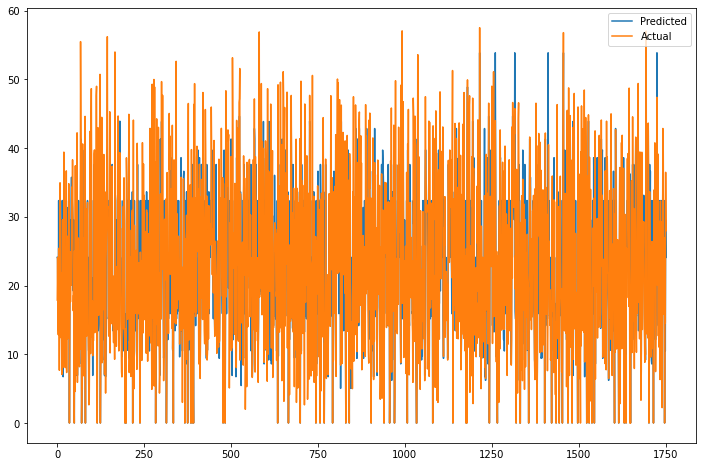

In [411]:
#Let's Plot the figure
plt.figure(figsize=(12,8))
plt.plot((y_pred_test_dt))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

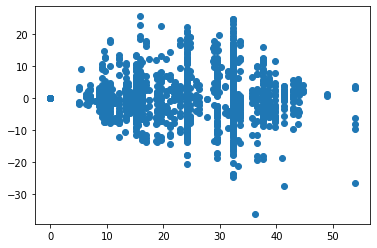

In [412]:
#Heteroscadacity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))

# **RANDOM FOREST**

In [413]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=30,max_depth=25)

In [414]:
#Fit the model
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, n_estimators=30)

In [415]:
# Making predictions on train and test data
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)


**Applying metrices on train data.**

In [416]:
#Let,s check MSE
MSE_rf= mean_squared_error((y_train), (y_pred_train_rf))
print("MSE :",MSE_rf)

#Let,s check RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

#Let,s calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",MAE_rf)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2_rf)
Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_train_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 2.2954040969594596
RMSE : 1.5150591067544064
MAE : 0.9646578510471391
R2 : 0.9851269509908783
Adjusted R2 : 0.984716720179007


* ***The R2 value here is 98 it means our model is able to predict most of the values correctly and model is fitting very well.***

In [417]:
#Let's store the train matrices in a dataframe.
first = {'Model':'Random Forest',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)
       }
metric_train_df=metric_train_df.append(first,ignore_index=True)

**Applying metrices on test data.**

In [418]:
#Let,s check MSE
MSE_rf= mean_squared_error((y_test), (y_pred_test_rf))
print("MSE :",MSE_rf)

#Let,s check RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

#Let,s calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_rf)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_rf= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2_rf)
Adjusted_R2_rf = (1-(1-r2_score(y_test, y_pred_test_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 13.116155586532837
RMSE : 3.621623335816804
MAE : 2.244657505721665
R2 : 0.9167155546038843
Adjusted R2 : 0.914418389736738


**The r2_score for the test set is 0.91. This means our linear model is  performing well on the data.**




In [419]:
#Let's store the test matrices in a dataframe.
first = {'Model':'Random Forest ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)
       }
metric_test_df=metric_test_df.append(first,ignore_index=True)

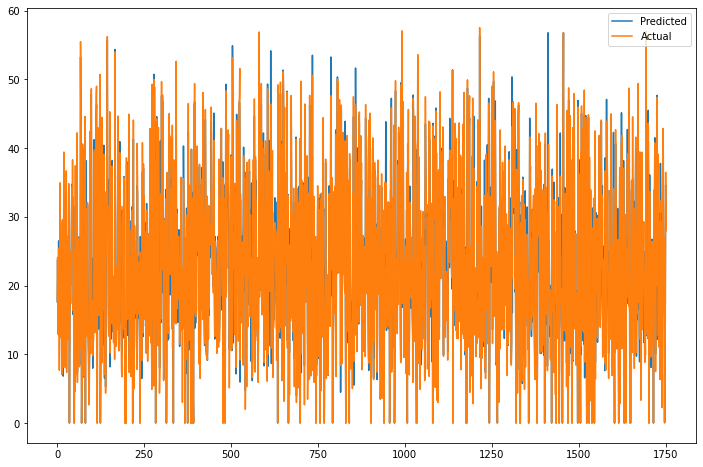

In [420]:
#Let's Plot the figure
plt.figure(figsize=(12,8))
plt.plot((y_pred_test_rf))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

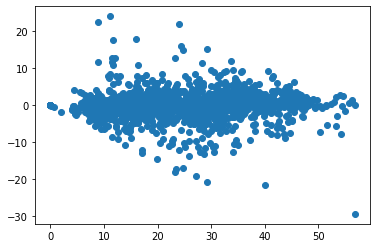

In [421]:
#Heteroscadacity
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))

In [422]:
#Let's check the feature importance
rf_model.feature_importances_

array([3.17188405e-01, 1.56628779e-01, 1.10815087e-02, 1.09758817e-02,
       2.78520965e-02, 3.27489492e-02, 1.47668229e-03, 4.98403944e-03,
       1.47693614e-02, 2.09768571e-02, 3.04942201e-02, 2.72414694e-02,
       8.86233377e-03, 4.09308581e-03, 1.30326523e-02, 9.14410840e-04,
       2.00724051e-03, 9.90912511e-04, 2.33585094e-04, 1.74742166e-04,
       2.61467169e-04, 1.32331230e-03, 3.31337812e-03, 1.05605148e-02,
       3.27660914e-02, 1.67139380e-02, 1.12516273e-02, 1.19557827e-02,
       8.64593956e-03, 3.48159397e-03, 3.59291463e-03, 9.19658501e-04,
       9.51859340e-03, 3.99434581e-03, 1.52746393e-01, 2.53545236e-04,
       4.30954665e-03, 1.04581214e-03, 1.40130833e-03, 2.37353266e-03,
       6.94122581e-04, 2.44804381e-03, 7.81666239e-04, 3.10902133e-03,
       5.31308781e-03, 8.32762993e-04, 1.96647875e-02])

In [423]:
weightage = rf_model.feature_importances_

weightage = {'Feature' : list(x_train.columns),
                   'Feature Importance' : weightage}

weightage_df = pd.DataFrame(weightage)

In [424]:
weightage_df['Feature Importance'] = round(weightage_df['Feature Importance'],2)

In [425]:
weightage_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
1,Humidity,0.16
34,Functioning_Day_Yes,0.15
10,Hour_4,0.03
4,Solar_Radiation,0.03
5,Rainfall,0.03
24,Hour_18,0.03
11,Hour_5,0.03
25,Hour_19,0.02
46,weekend_and_weekdays_1,0.02


In [426]:
features = x_train.columns
weightage = rf_model.feature_importances_
indices = np.argsort(weightage)

Text(0.5, 0, 'Relative Importance')

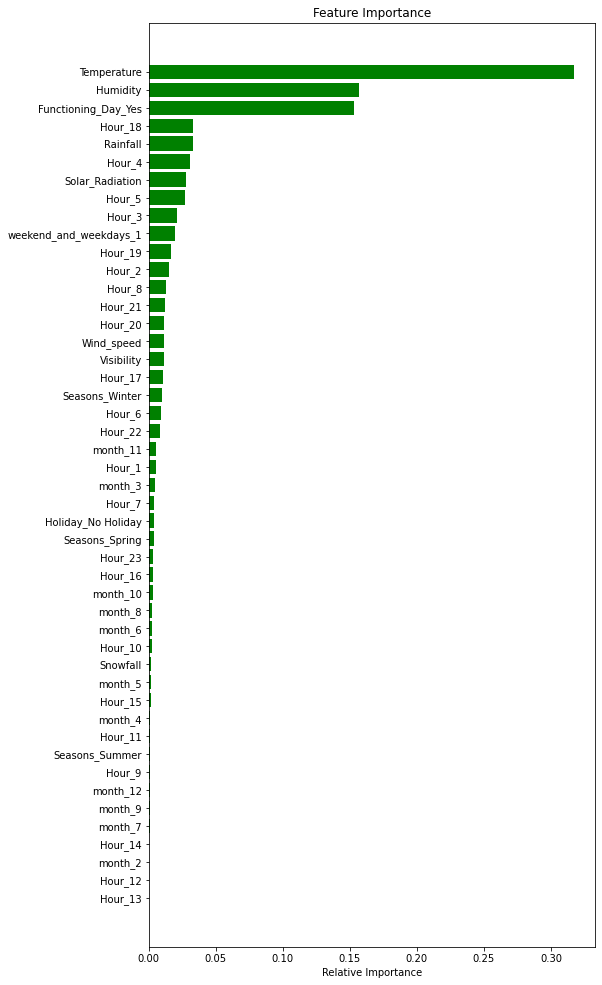

In [427]:
#Plot the figure
plt.figure(figsize=(8,17))
plt.title('Feature Importance')
plt.barh(range(len(indices)), weightage[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

We can see the weightage or importance given to every feature by the model and how it is effecting to dependent variable.

# **GRADIENT BOOSTING**

In [428]:
# Create an instance of the GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()

In [429]:
#Fitting the model
gbr_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [430]:
# Making predictions on train and test data

y_pred_train_gb = gbr_model.predict(x_train)
y_pred_test_gb = gbr_model.predict(x_test)


**Applying metrices on train data.**

In [431]:
#Let,s check MSE
MSE_gb= mean_squared_error((y_train), (y_pred_train_gb))
print("MSE :",MSE_gb)

#Let,s check RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

#Let,s calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_gb)
print("MAE :",MAE_gb)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 18.730814047267177
RMSE : 4.3279110489088355
MAE : 3.2812215168836603
R2 : 0.8786338685747016
Adjusted R2 : 0.8752863285647315


**Looks like our r2 score value is 0.87 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [432]:
#Let's store the train matrices in a dataframe.
first = {'Model':'Gradient Boosting Regression',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2)
       }
metric_train_df=metric_train_df.append(first,ignore_index=True)

**Applying metrices on test data.**

In [433]:
#Let,s check MSE
MSE_gb= mean_squared_error((y_test), (y_pred_test_gb))
print("MSE :",MSE_gb)

#Let,s check RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

#Let,s calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_gb)
print("MAE :",MAE_gb)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_gb= r2_score(y_test, y_pred_test_gb)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_test, y_pred_test_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 21.48922367586383
RMSE : 4.635647061183997
MAE : 3.4873688039065405
R2 : 0.863548578390225
Adjusted R2 : 0.8597849534984061


**The r2_score for the test set is 0.86. This means our model is  performing well on the data.**




In [434]:
# storing the test set metrics value in a dataframe for later comparison
first={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
metric_test_df=metric_test_df.append(first,ignore_index=True)

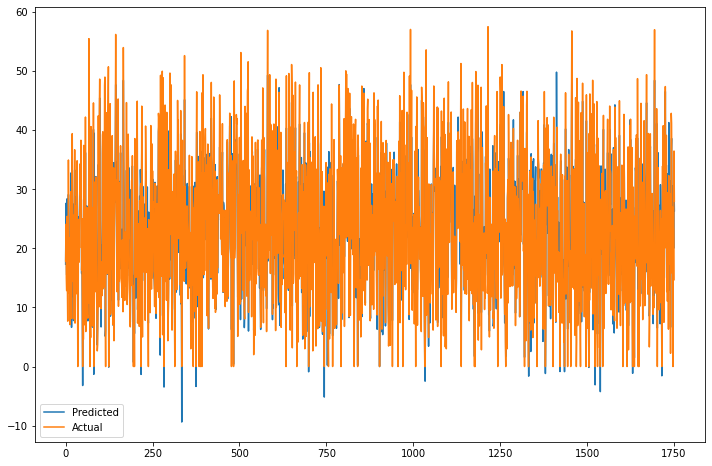

In [435]:
#Let's Plot the figure
plt.figure(figsize=(12,8))
plt.plot((y_pred_test_gb))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

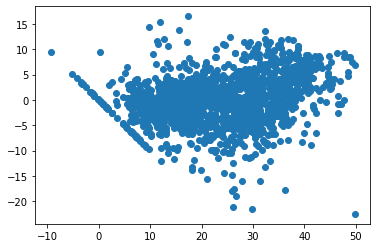

In [436]:
#Heteroscadacity
plt.scatter((y_pred_test_gb),(y_test)-(y_pred_test_gb))

In [437]:
#Let's check the feature importance
gbr_model.feature_importances_

array([3.16288141e-01, 1.26857014e-01, 5.25463591e-04, 6.51585562e-04,
       4.93185702e-02, 6.20406532e-02, 0.00000000e+00, 1.69605686e-04,
       5.74686661e-03, 1.34814311e-02, 2.44323477e-02, 2.24999433e-02,
       5.56549329e-03, 1.95458054e-03, 9.86632853e-03, 0.00000000e+00,
       3.13633527e-03, 1.67014140e-03, 0.00000000e+00, 0.00000000e+00,
       3.94189706e-05, 0.00000000e+00, 2.70232332e-04, 7.10242861e-03,
       3.05329993e-02, 1.68743839e-02, 1.16353523e-02, 1.75817097e-02,
       1.43423562e-02, 7.83953698e-04, 0.00000000e+00, 1.23992915e-03,
       3.56088834e-02, 2.75237400e-03, 1.78990725e-01, 0.00000000e+00,
       1.43248885e-03, 4.37928426e-05, 3.44531883e-04, 4.91578089e-03,
       1.51807513e-05, 1.79361358e-03, 0.00000000e+00, 8.12358350e-03,
       5.51038690e-03, 2.95768811e-04, 1.55656240e-02])

In [438]:
weightage = gbr_model.feature_importances_

weightage = {'Feature' : list(x_train.columns),
                   'Feature Importance' : weightage}

weightage_df = pd.DataFrame(weightage)

In [439]:
weightage_df['Feature Importance'] = round(weightage_df['Feature Importance'],2)

In [440]:
weightage_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
34,Functioning_Day_Yes,0.18
1,Humidity,0.13
5,Rainfall,0.06
4,Solar_Radiation,0.05
32,Seasons_Winter,0.04
24,Hour_18,0.03
11,Hour_5,0.02
27,Hour_21,0.02
25,Hour_19,0.02


In [441]:
features = x_train.columns
weightage = gbr_model.feature_importances_
indices = np.argsort(weightage)

Text(0.5, 0, 'Relative Importance')

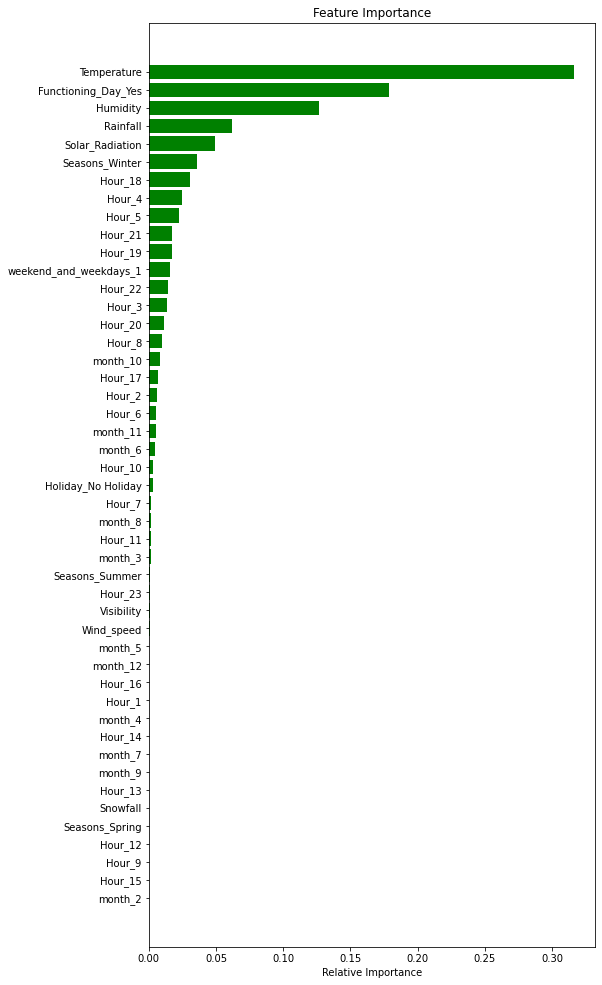

In [442]:
#Plot the figure
plt.figure(figsize=(8,17))
plt.title('Feature Importance')
plt.barh(range(len(indices)), weightage[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

#**Hyperparameter tuning** 

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model  argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

<b> Using GridSearchCV

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

##**Gradient Boosting Regressor with GridSearchCV**

### **Provide the range of values for chosen hyperparameters**

In [443]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

max_features = ['auto','sqrt','log2']

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [444]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50, 60]}

#**Let's work on model**

In [445]:
#Creating instance
gbr_model = GradientBoostingRegressor()

In [446]:
# Grid search
gbr_grid = GridSearchCV(estimator=gbr_model,
                       param_grid = param_dict,
                       cv = 6, verbose=2)

In [447]:
#Fitting the model
gbr_grid.fit(x_train,y_train)

Fitting 6 folds for each of 81 candidates, totalling 486 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=6, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [448]:
gbr_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [449]:
gbr_optimal_model = gbr_grid.best_estimator_

In [450]:
gbr_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [451]:
# Making predictions on train and test data

y_pred_train_g_g = gbr_optimal_model.predict(x_train)
y_pred_test_g_g= gbr_optimal_model.predict(x_test)

**Applying metrices on train data.**

In [452]:
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 7.505807191023707
RMSE : 2.739672825543902
MAE : 1.8631365411283431
R2 : 0.9513661937116054
Adjusted R2 : 0.9500247683034161


In [453]:
# storing the train set metrics value in a dataframe for later comparison
first={'Model':'GBR with gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2),
       }
metric_train_df=metric_train_df.append(first,ignore_index=True)

**Applying metrices on test data.**

In [454]:
#Let,s check MSE
MSE_gbh= mean_squared_error((y_test), (y_pred_test_g_g))
print("MSE :",MSE_gb)

#Let,s check RMSE
RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)

#Let,s calculate MAE
MAE_gbh= mean_absolute_error(y_test, y_pred_test_g_g)
print("MAE :",MAE_gb)

from sklearn.metrics import r2_score
#Let,s calculate r2 and adjusted r2
r2_gbh= r2_score(y_test, y_pred_test_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_test_g_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_g_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 21.48922367586383
RMSE : 3.5077351115176914
MAE : 3.4873688039065405
R2 : 0.9218712423985597
Adjusted R2 : 0.9197162825351397


In [455]:
# storing the test set metrics value in a dataframe for later comparison
first={'Model':'GBR with gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2),
       }
metric_test_df=metric_test_df.append(first,ignore_index=True)

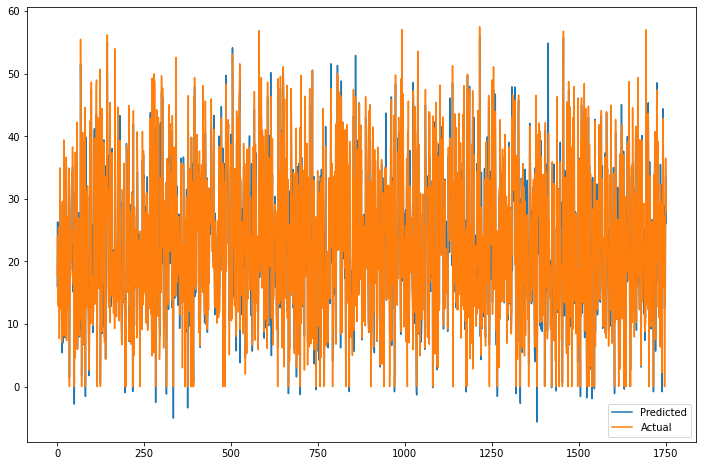

In [456]:
#Let's Plot the figure
plt.figure(figsize=(12,8))
plt.plot((y_pred_test_g_g))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

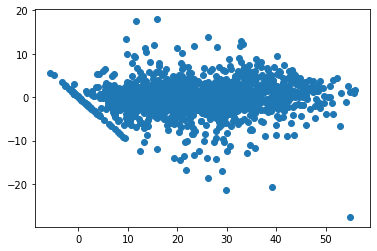

In [457]:
### Heteroscadacity
plt.scatter((y_pred_test_g_g),(y_test)-(y_pred_g_g))

In [458]:
gbr_optimal_model.feature_importances_

array([3.15979034e-01, 1.49784382e-01, 6.46551955e-03, 6.17329308e-03,
       3.49533361e-02, 4.29825365e-02, 1.12618070e-03, 2.04035865e-03,
       8.89471451e-03, 1.84815697e-02, 2.96970313e-02, 2.67098310e-02,
       7.44400859e-03, 4.95134339e-03, 1.20090330e-02, 3.05098341e-04,
       3.60229193e-03, 1.87482576e-03, 6.39166573e-05, 7.12048358e-05,
       1.45209827e-04, 2.70564844e-04, 8.79103043e-04, 8.27096154e-03,
       3.09446058e-02, 1.69508837e-02, 1.17630555e-02, 1.30591450e-02,
       1.09206689e-02, 2.58918001e-03, 4.31501329e-03, 1.71982921e-03,
       1.77727577e-02, 2.14463007e-03, 1.59443044e-01, 7.05887005e-05,
       1.70775155e-03, 1.05258711e-04, 8.75176920e-04, 4.62446626e-03,
       3.05930310e-04, 3.84579754e-03, 2.15424103e-04, 5.91497913e-03,
       3.90737306e-03, 1.12266124e-03, 2.25064303e-02])

In [459]:
weightage = gbr_optimal_model.feature_importances_

weightage = {'Feature' : list(x_train.columns),
                   'Feature Importance' : weightage}

weightage_df = pd.DataFrame(weightage)

In [460]:
weightage_df['Feature Importance'] = round(weightage_df['Feature Importance'],2)

In [461]:
weightage_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
34,Functioning_Day_Yes,0.16
1,Humidity,0.15
5,Rainfall,0.04
10,Hour_4,0.03
4,Solar_Radiation,0.03
24,Hour_18,0.03
11,Hour_5,0.03
32,Seasons_Winter,0.02
25,Hour_19,0.02


In [462]:
gbr_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [463]:
features = x_train.columns
weightage = gbr_model.feature_importances_
indices = np.argsort(weightage)

Text(0.5, 0, 'Relative Importance')

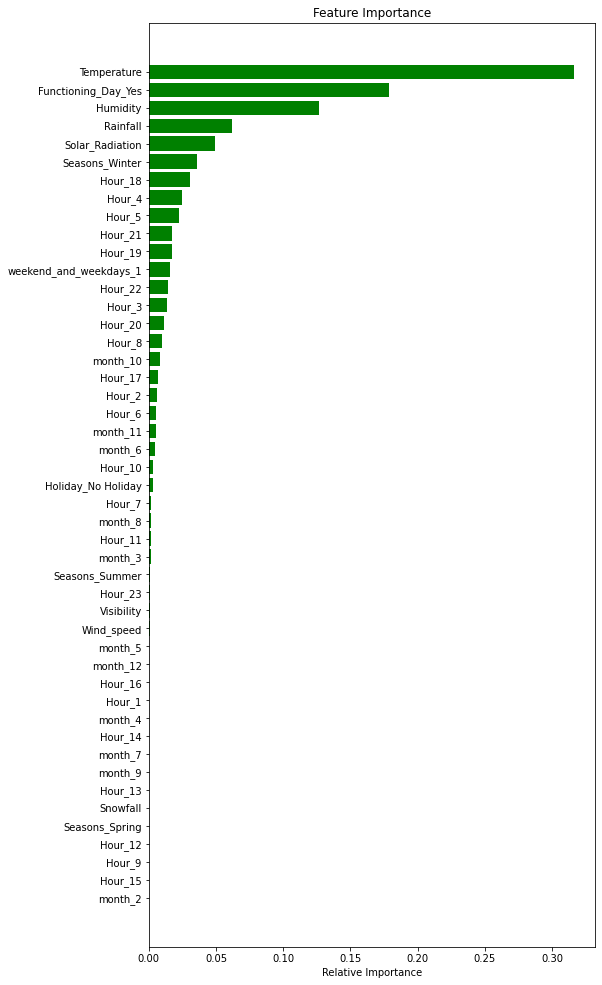

In [464]:
#Plot the figure
plt.figure(figsize=(8,17))
plt.title('Feature Importance')
plt.barh(range(len(indices)), weightage[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

* ***Finally we have depolyed all the models. Now we will do the conclusion.***

#**CONCLUSION**

During the time of our analysis, we did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented some machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [465]:
# displaying the results of evaluation metric values for all models
results=pd.concat([metric_train_df,metric_test_df],keys=['Training set','Test set'])
results

Model    MAE     MSE   RMSE  R2_score  \
Training set 0             Linear regression   4.459  34.794  5.899     0.775   
             1              Ridge regression   4.459  34.794  5.899     0.775   
             2              Lasso regression   7.267  91.855  9.584     0.405   
             3         Elastic Net Regression  5.794  57.389  7.576     0.628   
             4                  Decision_Tree  4.718  41.292  6.426     0.732   
             5                  Random Forest  0.965   2.295  1.515     0.985   
             6   Gradient Boosting Regression  3.281  18.731  4.328     0.879   
             7         GBR with gridsearchcv   1.863   7.506  2.740     0.951   
Test set     0             Linear regression   4.442  33.894  5.822     0.785   
             1              Ridge regression   4.443  33.896  5.822     0.785   
             2              Lasso regression   7.457  97.059  9.852     0.384   
             3        Elastic Net Regression   5.878  59.773  7.731     0.620   
             4                 Decision Tree   4.990  48.092  6.935     0.695   
             5                 Random Forest   2.245  13.116  3.622     0.917   
             6  Gradient boosting regression   3.487  21.489  4.636     0.864   
             7         GBR with gridsearchcv   2.370  12.304  3.508     0.922   

                Adjusted R2  
Training set 0         0.77  
             1         0.77  
             2         0.39  
             3         0.62  
             4         0.73  
             5         0.98  
             6         0.88  
             7         0.95  
Test set     0         0.78  
             1         0.78  
             2         0.37  
             3         0.61  
             4         0.69  
             5         0.91  
             6         0.86  
             7         0.92

***• No overfitting is seen.***

***• Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 98% and 95% recpectively for Train Set and 91% and 92% for Test set.***

***• We are able to see the importance of features and how it is effecting the dependent variable.***

***• Feature Importance value for Random Forest and Gradient Boost are different.***

***• We can deploy this model.***

**Some points to consider.**

***•The data which we have is dependent on time.***

***•Variable like temperature, windspeed, solar radiation etc., will not always be consistent.***

***• Sometimes there will be scenarios where the model might not perform well.***


As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.

* ***I have successfully completed the Machine Learning Capstone Project.***